<a href="http://landlab.github.io"><img style="float: left" 
src="https://avatars3.githubusercontent.com/u/7543483?s=200&v=4"></a>



## Reuse Ecohydrology Model with Gridded Hydrometeorology Forcing 

* Load data from a Landlab Cellular Automaton Vegetation-Ecohydrologic Model model published on HydroShare. <br />
* Define a geographic subset (New Mexico) within the North America.
* Calculate mean climatology for a range of elevation bands.
* Run the Landlab ecohydrology model for a watershed given various climate scenarios.<br />
* Explore sensitivity to climate by comparing the watershed model results.
* Save results to a new HydroShare resource.  <br />

## To run this notebook:

Click in each shaded code block below and use "shift + enter" keys. Alternatively, you can run groups of cells by clicking "Cell" on the menu above and selecting among the various run options. This is also where you can clear outputs from previous runs.

If an error occurs, click on *Kernal* and *Restart and Clear Outputs* in the menu above.
<hr> <small> For more instructions on how to run an interactive IPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<br>
<small>For the unexpanded version to download and run, click here: <a href="http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb">http://nbviewer.jupyter.org/github/landlab/tutorials/blob/master/ecohydrology/cellular_automaton_vegetation_DEM/cellular_automaton_vegetation_DEM_unexpanded.ipynb</a></small><br>

## 1. Introduction

** 1.1 Theory**

In this tutorial you will explore the role of climatology on the spatial development of tree, shrub, and grass plant functional types in a semiarid setting. The ecohydrologic vegetation dynamics model you will use in Landlab is based on CATGraSS, a discrete time cellular automata (CA) model for spatial evolution of plant functional types (PFTs) [Zhou et al., 2013].  Each cell in the domain can be occupied by a single PFT: Tree, Shrub, Grass or left unoccupied as bare soil. The model couples local ecohydrologic vegetation dynamics, which simulate biomass production based on local soil moisture and actual evapotranspiration, with spatial processes for plant establishment and mortality controlled by seed dispersal rules, water stress tolerance, and space availability (Figure 1). Tree and shrub plants disperse seeds to their neighbors. Grass seeds are assumed to be available at each cell. Establishment of plants in empty cells is determined probabilistically based on water stress of each PFT. Plants with lower water stress have higher probability of establishment. Plant mortality is simulated probabilistically as a result of aging and drought stress.

![CATGRassFlowChart](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/CATGRassFlowChart.jpg)

The model is driven by rainfall pulses (observed or generated), solar radiation and temperature. The latter two variables can also be used to prescribe a seasonal potential evapotranspiration input. In Landlab, the model is implemented as a set of interacting components, each describing a different element of the coupled system: PrecipitationDistribution, Radiation, PotentialEvapotranspiration, SoilMoisture, Vegetation (component for local growth), and VegCA (component for cellular automaton rules). Each process can also operate in isolation, outside the context of this example model. Landlab components and the flow chart used to couple the components in the model driver is given below [Hobley et al.,2017].  


![CATGRassComponents](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/CATGRassComponents.jpg)


This model (driver) contains:
  - A local vegetation dynamics model that simulates storm and inter-storm water balance and ecohydrologic fluxes (ET, runoff), and plant biomass dynamics by coupling the following components:
        - PrecipitationDistribution
        - Radiation
        - PotentialEvapotranspiration
        - SoilMoisture
        - Vegetation

  - A spatially explicit probabilistic cellular automaton component that simulates plant competition by tracking establishment and mortality of plants based on soil moisture stress:
        - VegCA
    
To run this Jupyter notebook, please make sure that the following files are in the same folder:
        - cellular_automaton_vegetation_flat_domain.ipynb (this notebook)
        - Inputs_Vegetation_CA.txt (Input parameters for the model)
        - Ecohyd_functions_flat.py (Utility functions)

References:

Hobley, D. E. J., Adams, J. M., Nudurupati, S. S., Hutton, E. W. H., Gasparini, N. M., Istanbulluoglu, E., and Tucker, G. E. (2017): Creative computing with Landlab: an open-source toolkit for building, coupling, and exploring two-dimensional numerical models of Earth-surface dynamics, Earth Surf. Dynam. doi:10.5194/esurf-5-21-2017.

Zhou, X, E. Istanbulluoglu, and E.R. Vivoni. "Modeling the ecohydrological role of aspect-controlled radiation on tree-grass-shrub coexistence in a semiarid climate." Water Resources Research 49.5 (2013): 2872-2895

Rodriguez-Iturbe, I. (2000), Ecohydrology: A hydrologic perspective ofclimate-soil-vegetation dynamics, Water Resour. Res., 36(1), 3–9.

Eagleson, P. S. (1982), Ecological optimality in water-limited natural soilvegetation systems: 1. Theory and hypothesis, Water Resour. Res.,18(2), 325–340.

** 1.2 Landscape **
In this tutorial, we are going to work with a hypothetical rectangular domain over which we will impose elevation-dependent climatologies from New Mexico, USA to simulate vegetation patterns using CATGraSS. The climate in this area is semi-arid with Mean Annual Precipitation (MAP) varying in the 200 - 350 mm as a function of elevation.

The watershed domains and processed climate data are available as a Notebook in this Hydroshare resource
[New Mexico Climate Data Notebook](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/ogh_newmexico/observatory_gridmet_newmexico.ipynb), and imported as part of this exercise.
[New Mexico Climate by Elevation](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/NewMexicoEcohydrology.jpg "Climate Bands by Elevation")

** 1.3 Steps to Explore the Model** 

We will do the following: 
- Import and review a pre-processed gridded hydroclimatology data dictionary for three different elevation bands. 
- Run the coupled Ecohydrology and cellular automata plant competition model for 50 years for a daily timestep. 
- Visualize and examine spatio-temporal outputs.

Start at the top by reading each block of text and sequentially running each code block (put your curser in a code block and type shift + enter OR got to the _Cell_ pulldown menu at the top and choose _Run Cells_). 

Remember that you can always go to the _Kernel_ pulldown menu at the top and choose _Restart & Clear Output_ or _Restart & Run All_ if you change things and want to start afresh. 



## 2.0 Methods

### 2.1 Data Science Methods

** 2.1.1 Import Landlab components, functions for importing data, plotting tools, and HydroShare utilities **

To run this notebook, we must import several libraries.
The hs_utils library provides functions for interacting with HydroShare, including resource querying, dowloading. and creation. Additional libraries support the functions of Landlab.

In [9]:
#Landlab toolkit available on CUAHSI JupyterHub 
from landlab import RasterModelGrid as rmg

#Python libraries available on CUAHSI JupyterHub 
import os
import pandas as pd, numpy as np, dask, json
from datetime import datetime, timedelta
import geopandas as gpd

# plotting and shape libraries
%matplotlib inline
import matplotlib.pyplot as plt

# silencing warning
import warnings 
warnings.filterwarnings('ignore')

#HydroShare Utilities
from utilities import hydroshare
hs=hydroshare.hydroshare()


Adding the following system variables:
   HS_USR_NAME = ChristinaBandaragoda
   HS_RES_ID = 70b977e22af544f8a7e5a803935c329c
   HS_RES_TYPE = genericresource
   JUPYTER_HUB_IP = jupyter.cuahsi.org

These can be accessed using the following command: 
   os.environ[key]

   (e.g.)
   os.environ["HS_USR_NAME"]  => ChristinaBandaragoda
Successfully established a connection with HydroShare


** 2.1.2 Install software not on already installed on the CUAHSI JupyterHub Server **

In [10]:
import ogh

In [11]:
homedir = ogh.mapContentFolder(str(os.environ["HS_RES_ID"]))
print('Data will be loaded from and save to:\n'+homedir)

Data will be loaded from and save to:
/home/jovyan/work/notebooks/data/70b977e22af544f8a7e5a803935c329c/70b977e22af544f8a7e5a803935c329c/data/contents


** 2.1.3 Import python scripts from a public HydroShare resource **

Import libraries from scripts into Jupyter Notebook

In [12]:
from ecohydrology_model_functions import run_ecohydrology_model, plot_results

### 2.2 Climate Science Methods

**2.2.1 Read in climate data processed with the steps above but for 8000+ points from the State of New Mexico.**  These have been saved in .json files after running the NewMexico_observatory_gridmet.ipynb but do not include daily values of variables for each grid cell, but the daily average for three elevation bands. 

Low elevation = 0 - 1500 m

Mid elevation = 1500 - 2000 m

High elevation = 2500 - 3500 m

![New Mexico Climate by ELevation](https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/figures/NewMexico_elevationbands.JPG)
 
Figure 3. New Mexico climate bands by elevation correspond with high elevation (white) with trees (dark green in aerial photography).

In [13]:
# These files are processed from 
# https://www.hydroshare.org/resource/70b977e22af544f8a7e5a803935c329c/data/contents/NewMexico_Observatory_GridMet_RioSaladoInput.ipynb
ltm_low=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_lowElevation.json'))
ltm_mid=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_midElevation.json'))
ltm_high=ogh.readDictOfDf(os.path.join(homedir, 'ogh_newmexico/NewMexico_highElevation.json'))

** 2.2.2 Review statistics and variables available for a dictionary, e.g. Low Elevation**

In [14]:
sorted(ltm_low.keys())

['anom_year_PRECIP_dailymet_livneh2015',
 'anom_year_TMAX_dailymet_livneh2015',
 'anom_year_TMIN_dailymet_livneh2015',
 'anom_year_WINDSPD_dailymet_livneh2015',
 'meanallyear_PRECIP_dailymet_livneh2015',
 'meanallyear_TMAX_dailymet_livneh2015',
 'meanallyear_TMIN_dailymet_livneh2015',
 'meanallyear_WINDSPD_dailymet_livneh2015',
 'meandaily_PRECIP_dailymet_livneh2015',
 'meandaily_TMAX_dailymet_livneh2015',
 'meandaily_TMIN_dailymet_livneh2015',
 'meandaily_WINDSPD_dailymet_livneh2015',
 'meanmonth_PRECIP_dailymet_livneh2015',
 'meanmonth_TMAX_dailymet_livneh2015',
 'meanmonth_TMIN_dailymet_livneh2015',
 'meanmonth_WINDSPD_dailymet_livneh2015',
 'meanyear_PRECIP_dailymet_livneh2015',
 'meanyear_TMAX_dailymet_livneh2015',
 'meanyear_TMIN_dailymet_livneh2015',
 'meanyear_WINDSPD_dailymet_livneh2015',
 'month_PRECIP_dailymet_livneh2015',
 'month_TMAX_dailymet_livneh2015',
 'month_TMIN_dailymet_livneh2015',
 'month_WINDSPD_dailymet_livneh2015',
 'year_PRECIP_dailymet_livneh2015',
 'year_TMA

** 2.2.3 Extract selected variables from the dictionary **

The model uses daily precipitation and temperature to model ecohydrology.

In [78]:
P_met_low = ltm_low['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm
P_met_mid = ltm_mid['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm
P_met_high = ltm_high['meandaily_PRECIP_dailymet_livneh2015'] # Precipitation in mm

Tmax_met_low = ltm_low['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C
Tmax_met_mid = ltm_mid['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C
Tmax_met_high = ltm_high['meandaily_TMAX_dailymet_livneh2015'] # Tmax in C

Tmin_met_low = ltm_low['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C
Tmin_met_mid = ltm_mid['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C
Tmin_met_high = ltm_high['meandaily_TMIN_dailymet_livneh2015'] # Tmin in C

In [79]:
# Check Mean Annual Precipitation
P_met_low_MAP = np.mean(P_met_low.values)*365.
P_met_mid_MAP = np.mean(P_met_mid.values)*365.
P_met_high_MAP = np.mean(P_met_high.values)*365.

In [85]:
print('Low Elevation Annual Precip =', P_met_low_MAP)  
print('Mid Elevation Annual Precip =', P_met_mid_MAP)
print('High Elevation Annual Precip =', P_met_high_MAP)

Low Elevation Annual Precip = 315.642879726
Mid Elevation Annual Precip = 331.057654107
High Elevation Annual Precip = 375.841298118


** 2.2.4 Bias Correction and Tiling **

In [83]:
z_min = 850   # in meters
map_z_min = 0.1697*z_min - 28.34

# Bias corrections to Livneh Data (ref: Caylor et. al 2005 AWR; using meteorological data from Sevilleta,NM)
MAP_lit_low = ((1200.+1700.)/2.-850)*0.1697 + 115.91   # Mean annual precipitation in elev band 1 from literature in mm
MAP_lit_mid = ((1700.+2000.)/2.-850)*0.1697 + 115.91   # Mean annual precipitation in elev band 1 from literature in mm
MAP_lit_high = ((2000.+2500.)/2.-850)*0.1697 + 115.91   # Mean annual precipitation in elev band 1 from literature in mm

In [82]:
print('MAP Low Elevation Annual Precip =', MAP_lit_low)  
print('MAP Mid Elevation Annual Precip =', MAP_lit_mid)
print('MAP High Elevation Annual Precip =', MAP_lit_high)

MAP Low Elevation Annual Precip = 217.73
MAP Mid Elevation Annual Precip = 285.61
MAP High Elevation Annual Precip = 353.49


In [45]:
# Calculate bias correction factors for each elevation band
bc_low = float(P_met_low_MAP)/MAP_lit_low
bc_mid = float(P_met_mid_MAP)/MAP_lit_mid
bc_high = float(P_met_high_MAP)/MAP_lit_high

bc_low
bc_mid
bc_high

# Bias corrected precipitation:
P_met_low = np.array(P_met_low.values)/bc_low
P_met_mid = np.array(P_met_mid.values)/bc_mid
P_met_high = np.array(P_met_high.values)/bc_high

P_met_low.mean()*365.

P_met_mid.mean()*365.

P_met_high.mean()*365.

# Tiling meteorological data to extend the record to approximately 9.5k yrs.
P_met_low = np.tile(P_met_low, 150)
P_met_mid = np.tile(P_met_mid, 150)
P_met_high = np.tile(P_met_high, 150)

Tmax_met_low = np.tile(Tmax_met_low.values, 150)
Tmax_met_mid = np.tile(Tmax_met_mid.values, 150)
Tmax_met_high = np.tile(Tmax_met_high.values, 150)

Tmin_met_low = np.tile(Tmin_met_low.values, 150)
Tmin_met_mid = np.tile(Tmin_met_mid.values, 150)
Tmin_met_high = np.tile(Tmin_met_high.values, 150)

In [86]:
print('Corrected Factor Low Elevation  =', bc_low)  
print('Corrected Factor Mid Elevation  =', bc_mid)
print('Corrected Factor High Elevation  =', bc_high)

Corrected Factor Low Elevation  = 1.4496986162976737
Corrected Factor Mid Elevation  = 1.1591248699506247
Corrected Factor High Elevation  = 1.063230354799892


** 2.2.5 Explore how annual precipitation varies by elevation **

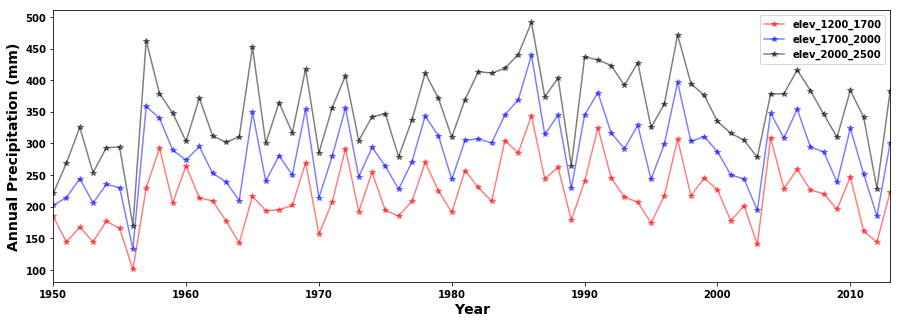

In [46]:
# print annual precipitation by elevation bands
P_fig1 = plt.figure(figsize=(15, 5))
fontdict = {'fontsize': 14, 'weight': 'bold'}
ax4 = P_fig1.add_subplot(111)
ax4.plot((ltm_low['meanyear_PRECIP_dailymet_livneh2015']*365./bc_low), 'r-*', label = 'elev_1200_1700', alpha=0.5)
ax4.plot((ltm_mid['meanyear_PRECIP_dailymet_livneh2015']*365./bc_mid), 'b-*', label = 'elev_1700_2000', alpha=0.5)
ax4.plot((ltm_high['meanyear_PRECIP_dailymet_livneh2015']*365./bc_high), 'k-*', label = 'elev_2000_2500', alpha=0.5)
plt.xlim([1950, 2013])
plt.ylabel('Annual Precipitation (mm)', fontdict=fontdict)
plt.xlabel('Year', fontdict=fontdict)
plt.xticks(np.arange(1950, 2013, step=10), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(prop={'weight':'bold'})
plt.show()

** 2.2.6 Print mean monthly temperature by elevation bands **

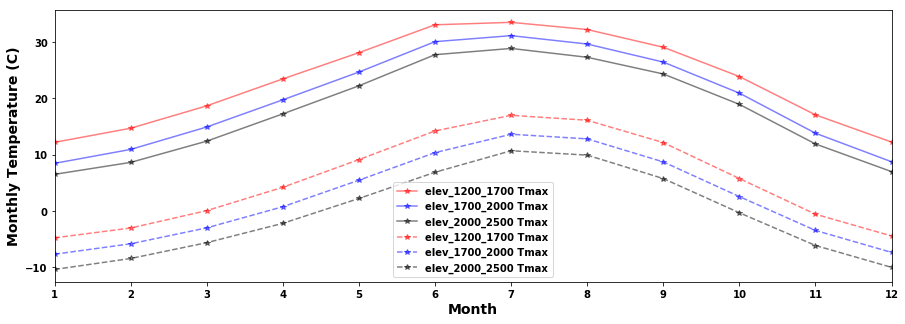

In [47]:
T_fig2 = plt.figure(figsize=(15, 5))
ax4 = T_fig2.add_subplot(111)
ax4.plot(ltm_low['meanmonth_TMAX_dailymet_livneh2015'],'r-*', label = 'elev_1200_1700 Tmax', alpha=0.5)
ax4.plot(ltm_mid['meanmonth_TMAX_dailymet_livneh2015'],'b-*', label = 'elev_1700_2000 Tmax', alpha=0.5)
ax4.plot(ltm_high['meanmonth_TMAX_dailymet_livneh2015'],'k-*', label = 'elev_2000_2500 Tmax', alpha=0.5)

ax4.plot(ltm_low['meanmonth_TMIN_dailymet_livneh2015'],'r--*', label = 'elev_1200_1700 Tmax', alpha=0.5)
ax4.plot(ltm_mid['meanmonth_TMIN_dailymet_livneh2015'],'b--*', label = 'elev_1700_2000 Tmax', alpha=0.5)
ax4.plot(ltm_high['meanmonth_TMIN_dailymet_livneh2015'],'k--*', label = 'elev_2000_2500 Tmax', alpha=0.5)

plt.xlim([1, 12])
plt.ylabel('Monthly Temperature (C)', fontdict=fontdict)
plt.xlabel('Month', fontdict=fontdict)
plt.xticks(np.arange(1, 13, step=1), fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.legend(prop={'weight':'bold'})
plt.show()

### 2.3 Ecohydrology Modeling using Landlab Methods 
** 2.3.1 Initialize Landlab grids **

In [21]:
grid_low = rmg((100, 100), spacing=(5., 5.))
grid_mid = rmg((100, 100), spacing=(5., 5.))
grid_high = rmg((100, 100), spacing=(5., 5.))

** 2.3.2 Import parameters from a file **

Include the input file that contains all input parameters needed for all components. This file can either be a python dictionary or a text file that can be converted into a python dictionary. If a text file is provided, it will be converted to a Python dictionary. Here we use an existing text file prepared for this exercise.

In [48]:
InputFile = 'ecohyd_inputs.yaml'

** 2.3.3  Initialize 'vegetation__plant_functional_type' field with a random array. **

We are populating the grid with a random arrangement of Plant Functional Types (PFTs)


In [49]:
grid_low.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_low.number_of_cells)
grid_mid.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_mid.number_of_cells)
grid_high.at_cell['vegetation__plant_functional_type'] = np.random.randint(0, 6, size=grid_high.number_of_cells)

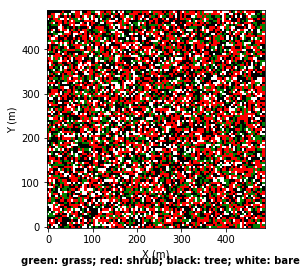

In [50]:
# Plot initial vegetation PFT state
from landlab.plot import imshow_grid
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(
            ['green', 'red', 'black', 'white', 'red', 'black'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
description = 'green: grass; red: shrub; black: tree; white: bare'
plt.figure(101)
imshow_grid(grid_low, 'vegetation__plant_functional_type', values_at='cell', cmap=cmap,
            grid_units=('m', 'm'), norm=norm, limits=[0, 5],
            allow_colorbar=False)
caption = plt.figtext(0.2, 0.0, description, weight='bold', fontsize=10)

Specify an approximate number of years for the model to run. For this example, we will run the simulation for 600 years. It might take less than 2+ minutes to run.

In [51]:
# Determine the length of simulations = length of input climate data
n = P_met_low.shape[0]

In [52]:
# Print n
n

3506400

In [54]:
input_data_low = {'precip_met': P_met_low,
                  'Tmax_met': Tmax_met_low,
                  'Tmin_met': Tmin_met_low}
input_data_mid = {'precip_met': P_met_mid,
                  'Tmax_met': Tmax_met_mid,
                  'Tmin_met': Tmin_met_mid}
input_data_high = {'precip_met': P_met_high,
                  'Tmax_met': Tmax_met_high,
                  'Tmin_met': Tmin_met_high}


Let's look at outputs.

Plots of the cellular field of PFT at specified year step can be found below where:

GRASS = green; SHRUB = red; TREE = black; BARE = white;

At the end, percentage cover of each PFT is plotted with respect to time.

In [58]:
# new number of storms
n = 100000
(VegType_low, yrs_low, debug_low) = run_ecohydrology_model(grid_low, 
                                                           input_data=input_data_low,
                                                           input_file=InputFile,
                                                           synthetic_storms=False,
                                                           number_of_storms=n,
                                                           pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years


In [59]:
yrs_low

272

Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


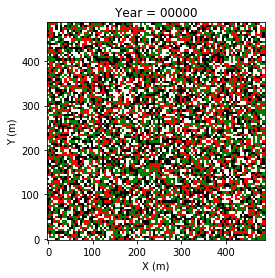

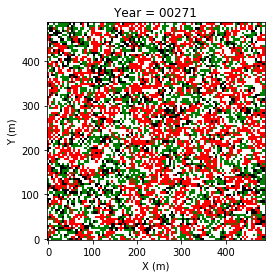

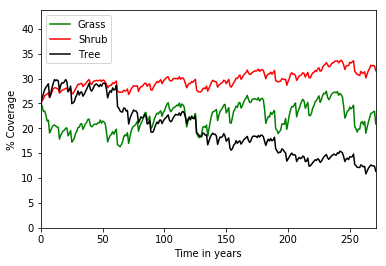

In [60]:
plot_results(grid_low, VegType_low, yrs_low, yr_step=yrs_low-1)
plt.savefig('grid_low.png')

In [61]:
(VegType_mid, yrs_mid, debug_mid) = run_ecohydrology_model(grid_mid, 
                                                           input_data=input_data_mid,
                                                           input_file=InputFile,
                                                           synthetic_storms=False,
                                                           number_of_storms=n,
                                                           pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years


Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


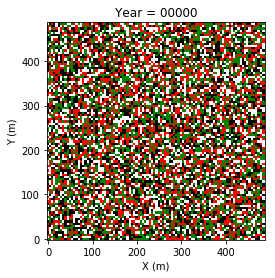

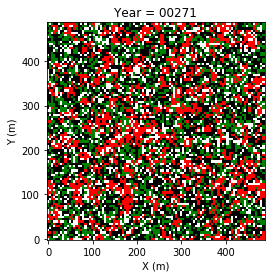

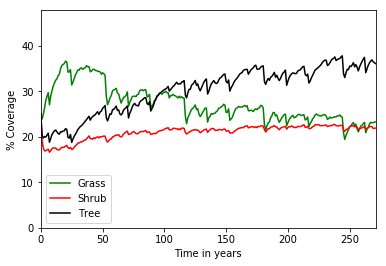

In [62]:
plot_results(grid_mid, VegType_mid, yrs_mid, yr_step=yrs_mid-1)
plt.savefig('grid_mid.png')

In [63]:
(VegType_high, yrs_high, debug_high) = run_ecohydrology_model(grid_high,
                                                              input_data=input_data_high,
                                                              input_file=InputFile,
                                                              synthetic_storms=False,
                                                              number_of_storms=n,
                                                              pet_method='PriestleyTaylor')

Elapsed time =  0  years
Elapsed time =  100  years
Elapsed time =  200  years


Plotting cellular field of Plant Functional Type
Green - Grass; Red - Shrubs; Black - Trees; White - Bare


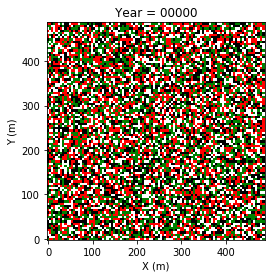

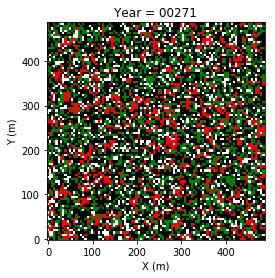

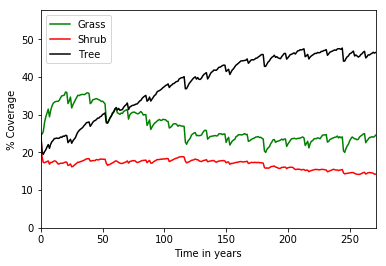

In [64]:
plot_results(grid_high, VegType_high, yrs_high, yr_step=yrs_high-1)
plt.savefig('grid_high.png')

If you want to explore this model further, open 'ecohyd_inputs.yaml' and change the input parameters (e.g., initial PFT distribution percentages, storm characteristics, etc..).

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>